In [6]:
import sys
sys.path.append('/../../QmeQ/qmeq/')
import qmeq

from scipy.linalg import eig, eigvals
import numpy as np

import matplotlib.pyplot as plt
import importlib
import plotting as p
import time_evolutor as te

In [7]:
#--SETUP: ---------------------------------------------------------------------------------
eps = 30
V_B = 30
mu_L = -V_B/2       
mu_R = V_B/2        

gammaL = 0.3
gammaR = gammaL
T_L = 1
T_R = 1
initial = np.array([0,1]) #[rho_0, rho_1]
# define time grid
ti_array = np.linspace(0,20,500)

In [8]:

importlib.reload(te)
sys, rho_ss, rho_t, I_ss, IL_t_qmeq, IR_t_qmeq, I_t_CF = te.calculate_single_res(initial, ti_array, eps, mu_L, mu_R, T_L, T_R, gammaL, gammaR)
print(' \n difference: ' + str(np.round(sys.phi0 - rho_ss,10).real) )

[[ 1.  0.]
 [-0.  1.]]
 
 difference: [-6.1442e-06  6.1442e-06]


fermi:  (100,)
epsilons:  (100,)
fermi:  (100,)
epsilons:  (100,)


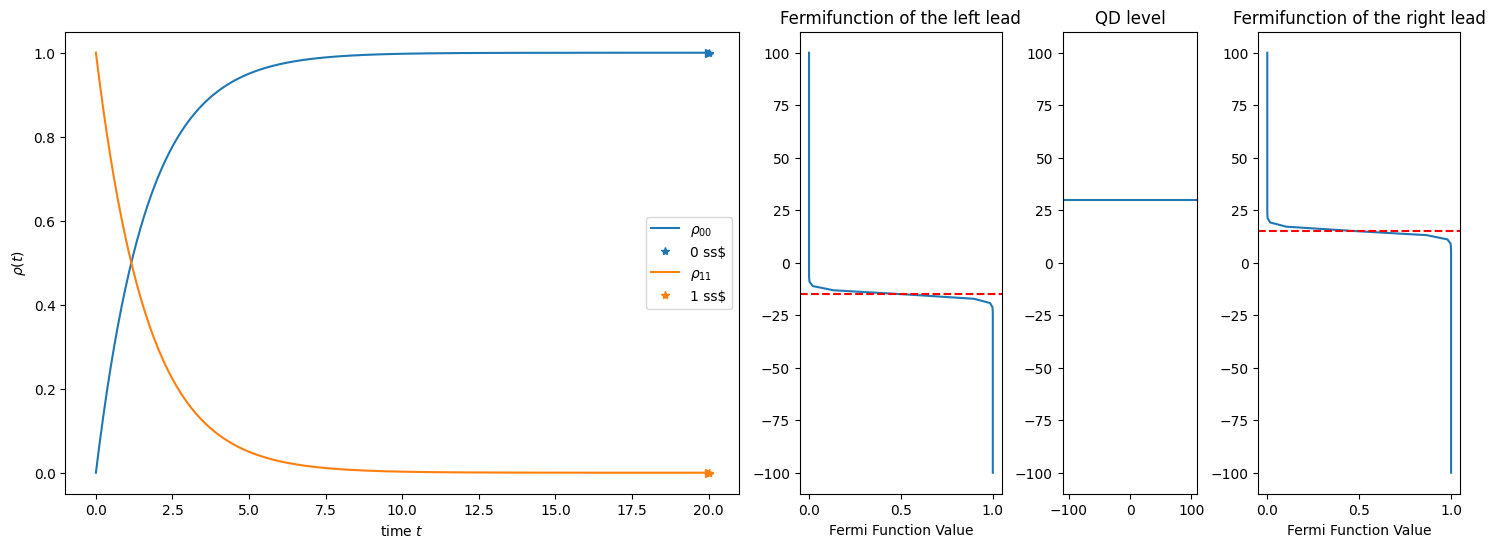

In [9]:
epsilons = np.linspace(-100,100,100)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 6), gridspec_kw={'width_ratios': [10, 3, 2, 3]}) 

#EVOLUTION OF DIAGONAL COMPONENTS

ax1.plot(ti_array, np.real(rho_t[0]), label = r'$\rho_{00}$')
ax1.plot(ti_array[-1],sys.phi0[0], '>',color = 'C0')
ax1.plot(ti_array[-1],sys.phi0[0], '*',color = 'C0', label = r'0 ss$')

ax1.plot(ti_array, np.real(rho_t[1]), label = r'$\rho_{11}$')
ax1.plot(ti_array[-1],sys.phi0[1], '>',color = 'C1')
ax1.plot(ti_array[-1],sys.phi0[1], '*',color = 'C1', label = r'1 ss$')

ax1.legend()

ax1.set_xlabel(r'time $t$')
ax1.set_ylabel(r'$\rho(t)$')


importlib.reload(p)
p.plot_fermi_function(epsilons, mu_L, T_L, ax2, "Fermifunction of the left lead")
p.plot_qd_level(epsilons, eps, ax3, "QD level")
p.plot_fermi_function(epsilons, mu_R, T_R, ax4, "Fermifunction of the right lead")


plt.show()

Text(0, 0.5, '$I(t)$')

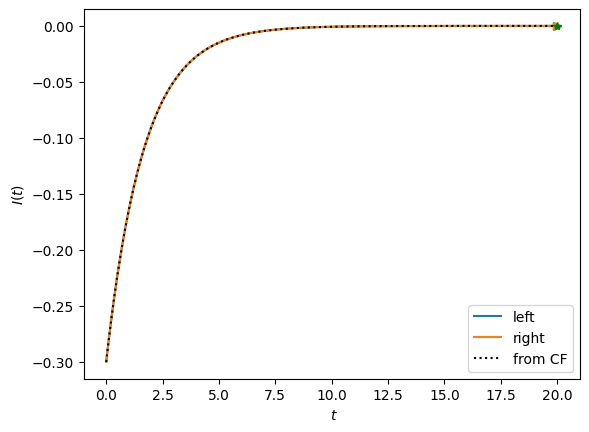

In [10]:
#plotting particle current

plt.plot(ti_array,IL_t_qmeq , label = 'left')
#plt.plot(ti_array[-1], I_ss[0],'*',color = 'black', label = r'qmeq $\rho_{ss}$')
plt.plot(ti_array[-1], I_ss[0], '>', color = 'C0', )

plt.plot(ti_array, IR_t_qmeq ,label = 'right')
plt.plot(ti_array[-1], (I_ss[1]), '>', color = 'C1' , )

plt.plot(ti_array, I_t_CF, ':', color = 'black', label = r'from CF')

plt.plot(ti_array[-1], I_ss[0], '*', color='green')

plt.plot

plt.legend()

plt.xlabel(r' $t$')
plt.ylabel(r'$I(t)$')